In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Raw Data Analysis

In [5]:
path = '/content/drive/My Drive/'
por = np.loadtxt(path + 'por.txt')
res = np.loadtxt(path + 'res.txt')
swat = np.loadtxt(path + 'swat.txt')
print(por.size, res.size, swat.size)

180000 180000 180000


In [6]:
df = pd.DataFrame({'por':por, 'res':res, 'swat':swat})

### Relations Check

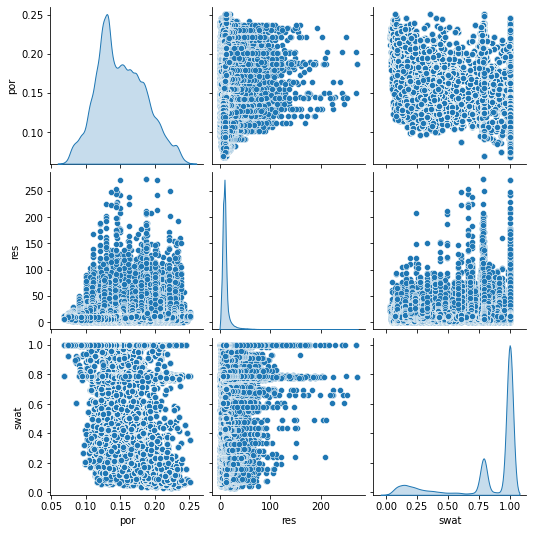

In [7]:
sns.pairplot(df[["por", "res", "swat"]], diag_kind="kde")

#### Distributions of Parameters

Since resistivity has log_norm distribution we have to work with logarithm of resestivity

In [8]:
lres = np.log(res)
df.insert(3, 'log_res', lres)

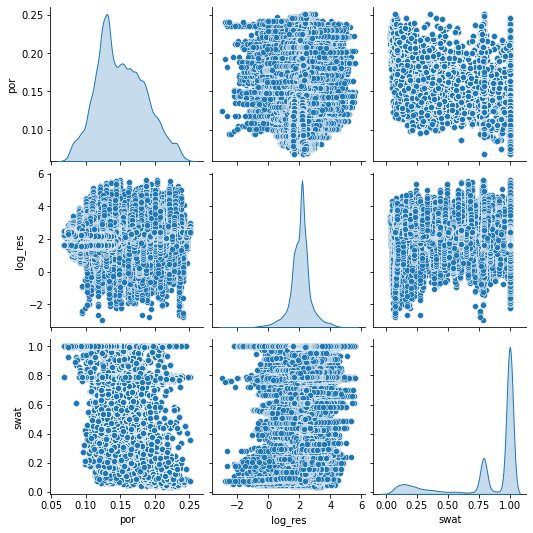

In [9]:
sns.pairplot(df[["por", "log_res", "swat"]], diag_kind="kde")

### Visual analysis of DataSet

Initial Array reshaping to Cube geometry

In [10]:
por = por.reshape(20, 90, 100)
res = res.reshape(20, 90, 100)
swat = swat.reshape(20, 90, 100)

In [11]:
def plot_param(parameter):
  x = np.linspace(0,90,100)
  y = np.linspace(0,89,90)
  fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(10, 50))
  for i in range(20):
    if i%2==0:
        j=0
    else: 
        j=1
    ax[round(i/2-0.1)][j].contourf(x, y, parameter[i])

##### Z-slices of Porosity from Top to Bottom

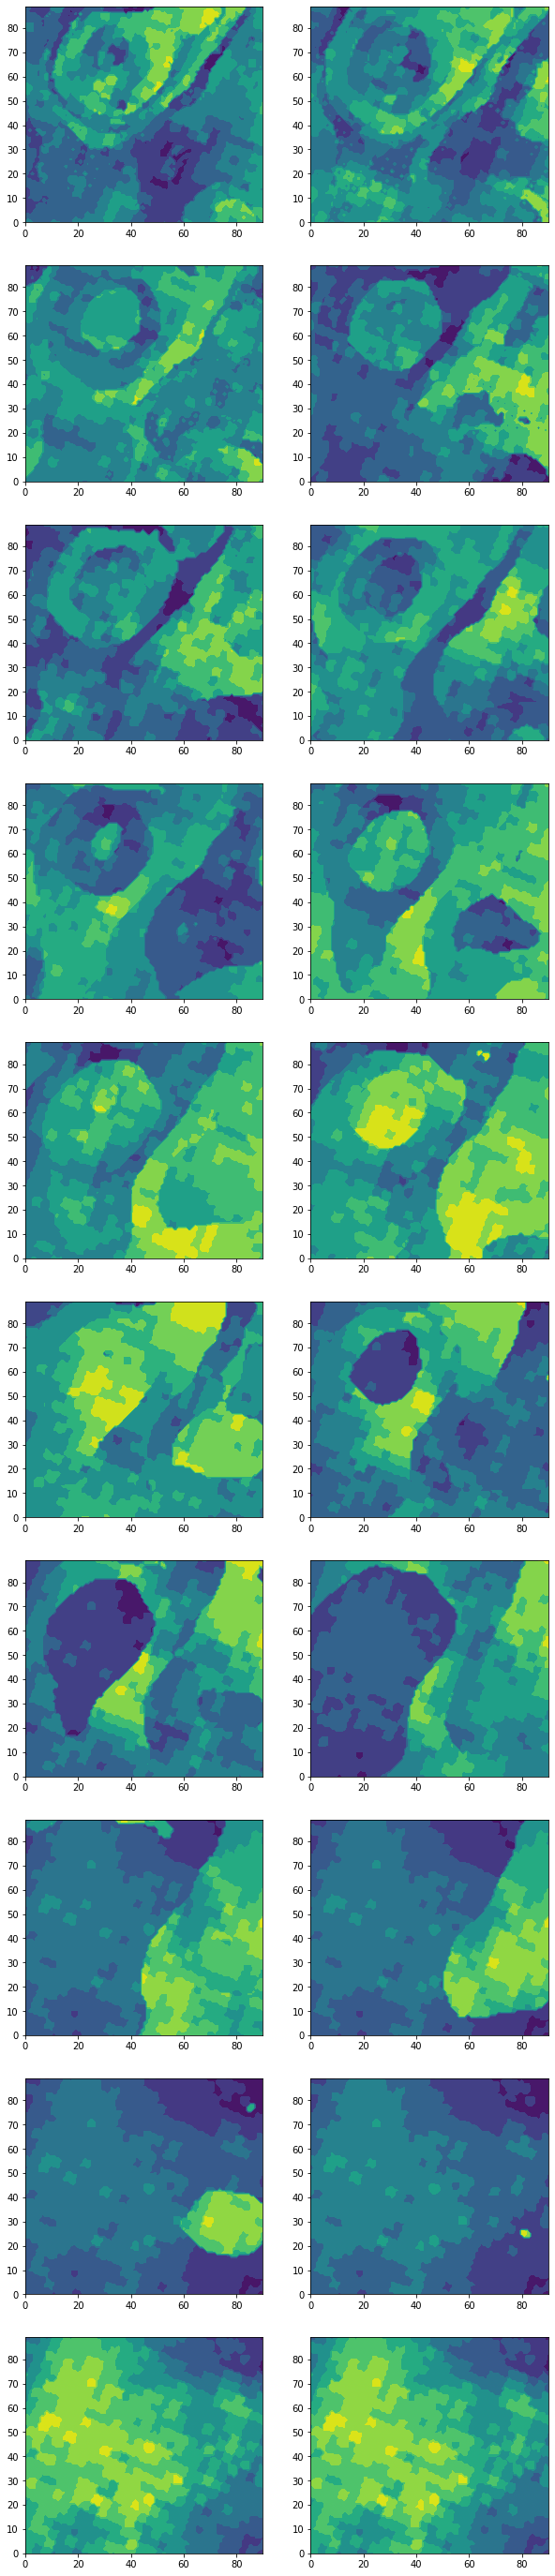

In [12]:
plot_param(por)

##### Z-sclices of Resistivity from top to bottom

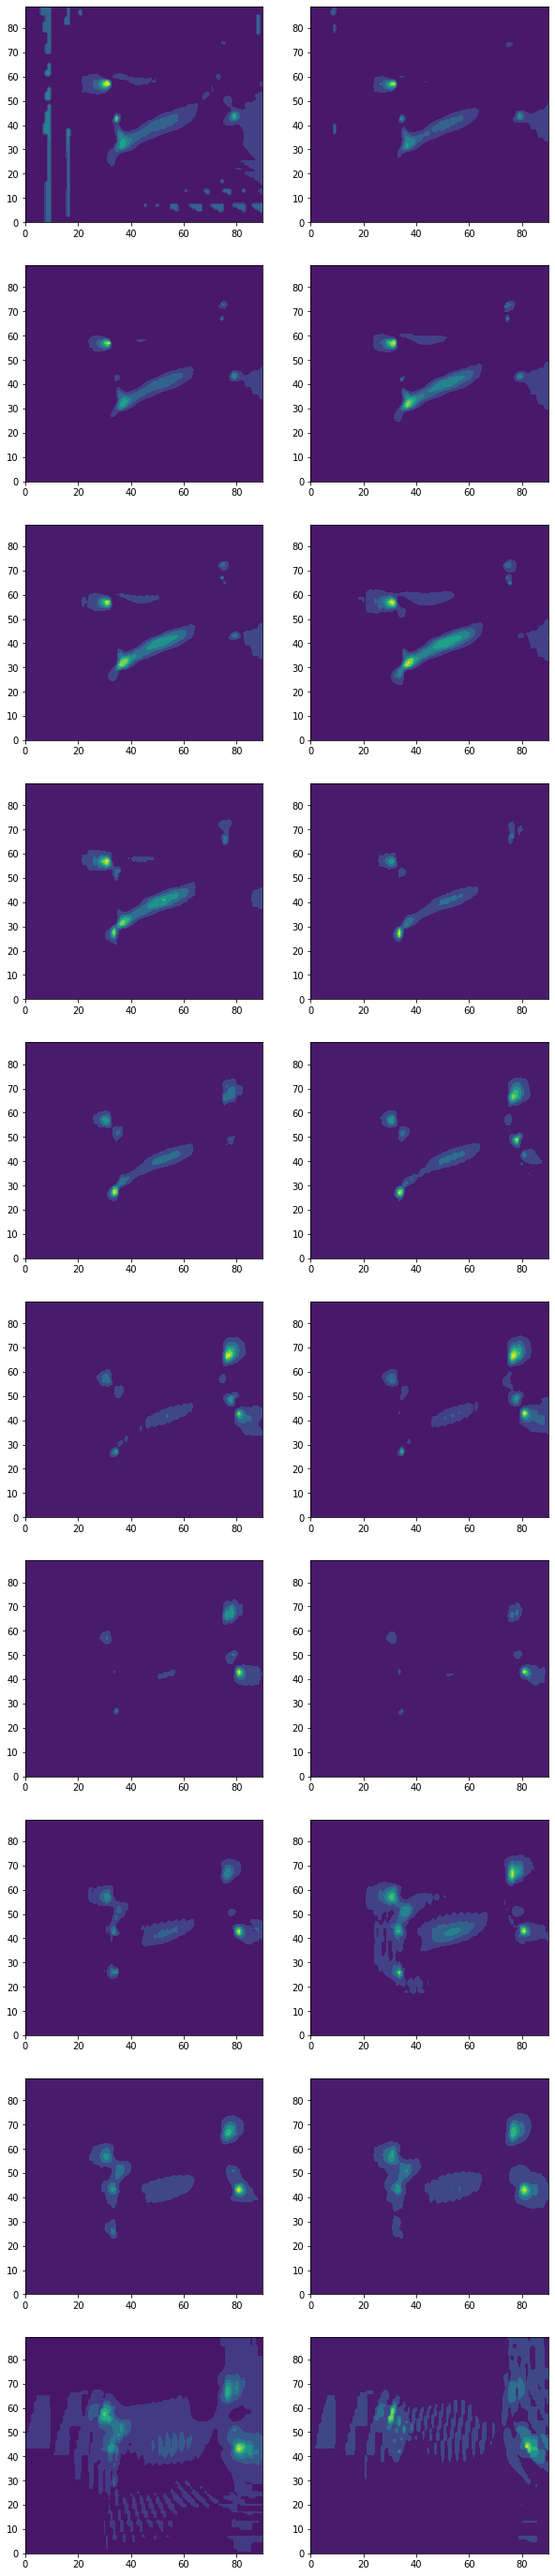

In [13]:
plot_param(res)

##### Z-slices of Water Saturation from Top to Bottom

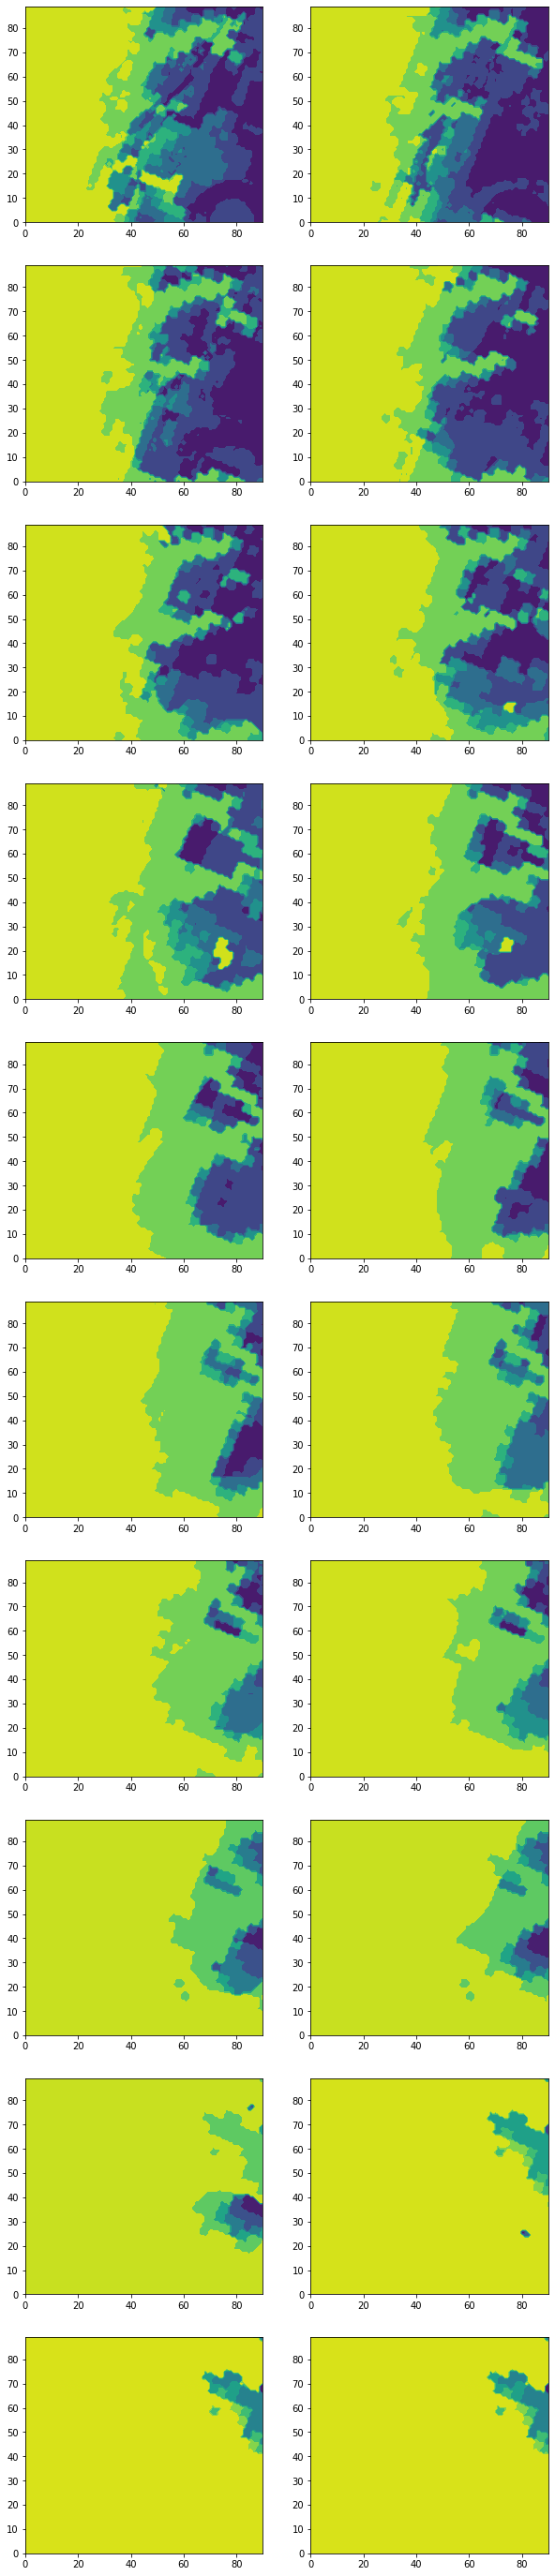

In [14]:
plot_param(swat)

#### Porosity-Resistivity-WaterSaturation Z-slices from top to bottom

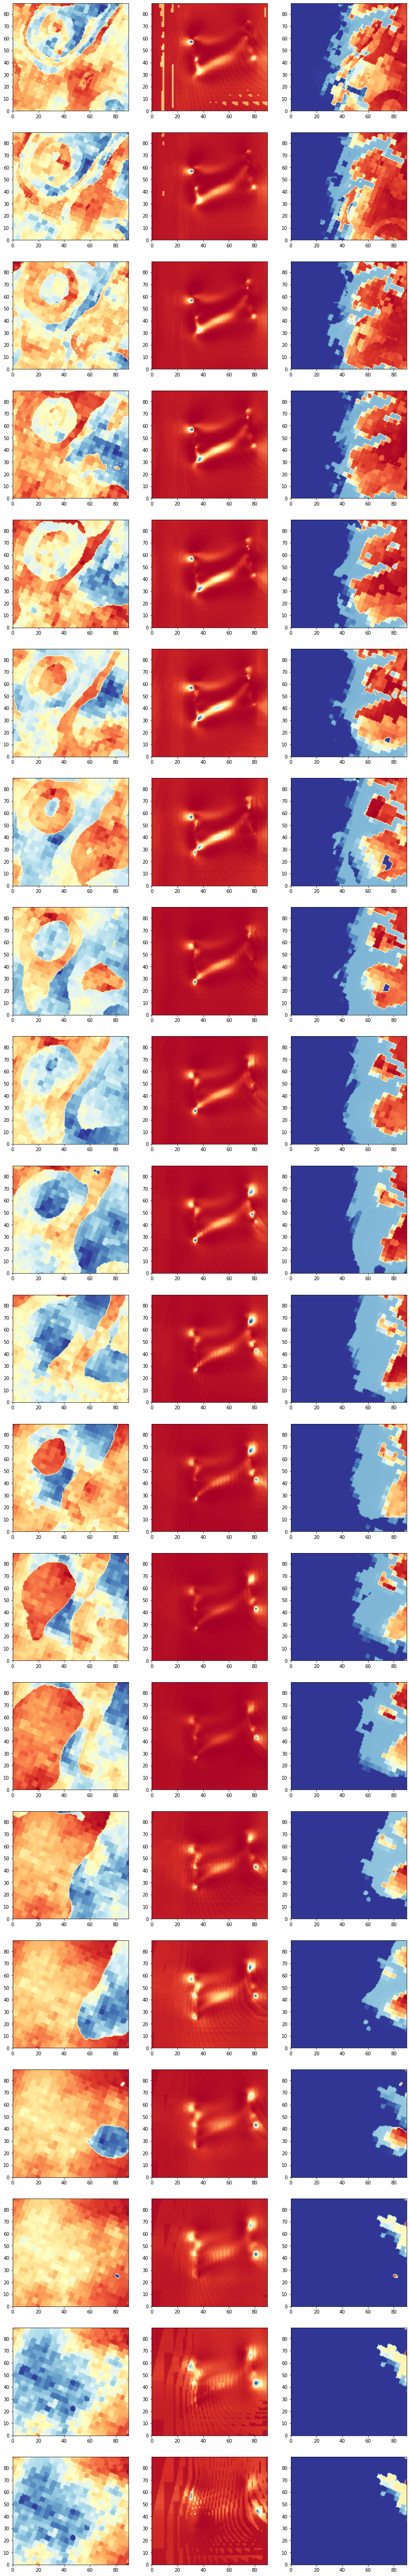

In [15]:
x = np.linspace(0,90,100)
y = np.linspace(0,89,90)
fig, ax = plt.subplots(nrows=20, ncols=3, figsize=(15, 100))
for i in range(20):
    ax[i][0].contourf(x, y, por[i], cmap='RdYlBu', levels=1000)
    ax[i][1].contourf(x, y, res[i], cmap='RdYlBu', levels=1000)
    ax[i][2].contourf(x, y, swat[i], cmap='RdYlBu', levels=1000)

#### Porosity-Resistivity-WaterSaturation X-slices

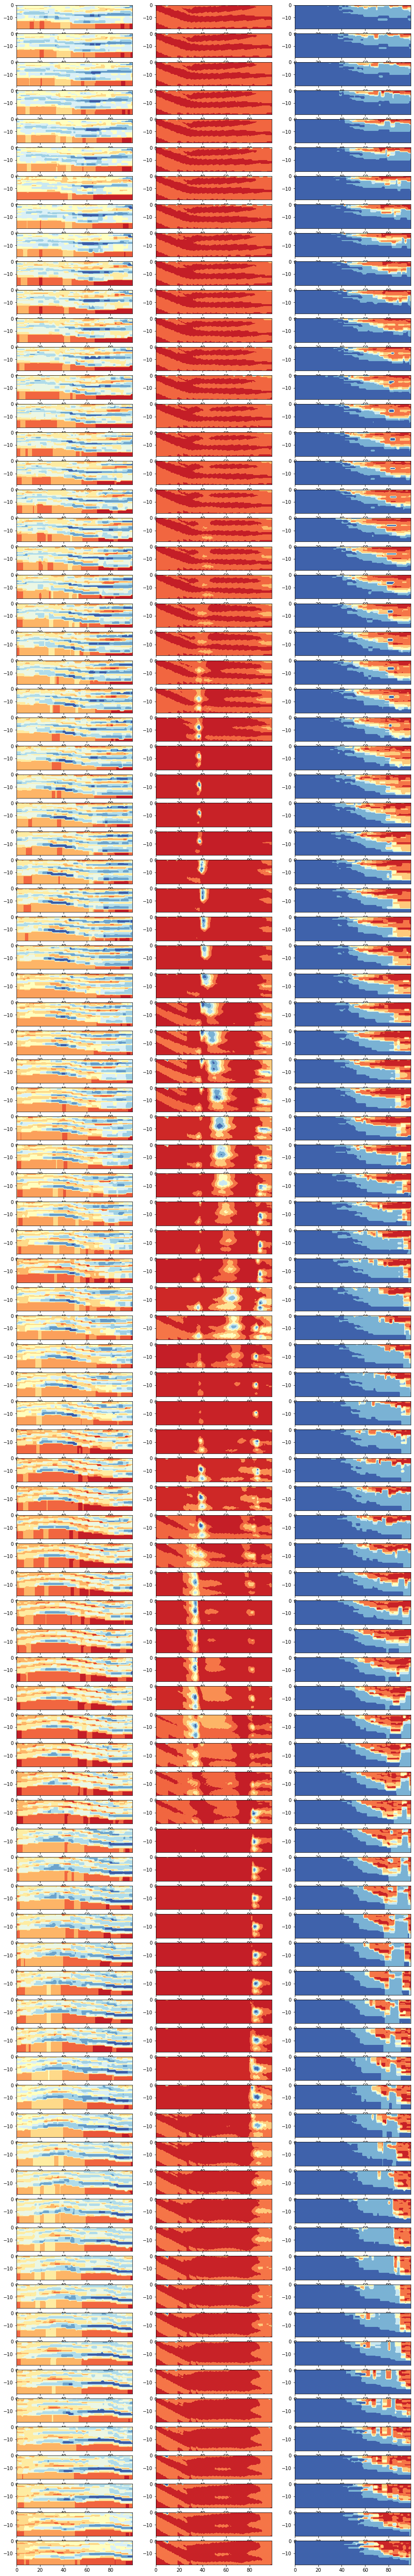

In [16]:
x1 = np.linspace(0,99,100)
y1 = np.linspace(0,-19,20)
fig, ax = plt.subplots(nrows=90, ncols=3, figsize=(15, 100))
for i in range(90):
    ax[i][0].contourf(x1, y1, por[:,i], cmap='RdYlBu')
    ax[i][1].contourf(x1, y1, res[:,i], cmap='RdYlBu')
    ax[i][2].contourf(x1, y1, swat[:,i], cmap='RdYlBu')

#### Porosity-Resistivity-WaterSaturation Y-slices

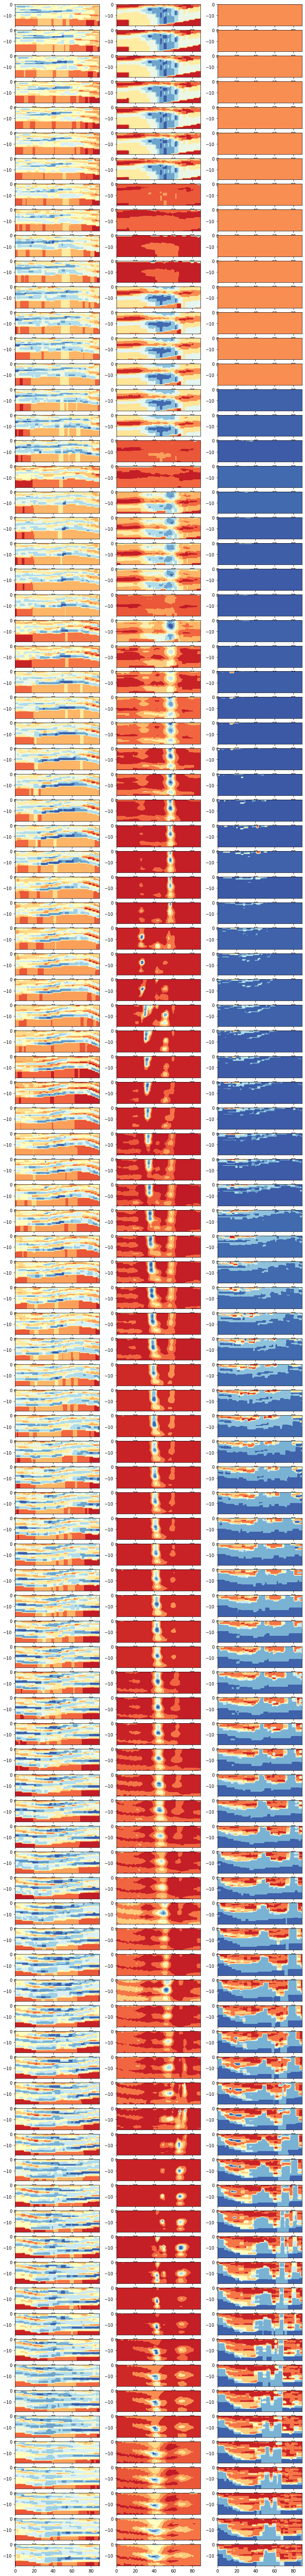

In [17]:
x2 = np.linspace(0,89,90)
y2 = np.linspace(0,-19,20)
fig, ax = plt.subplots(nrows=100, ncols=3, figsize=(12, 110))
for i in range(100):
    ax[i][0].contourf(x2, y2, por[:,:,i], cmap='RdYlBu')
    ax[i][1].contourf(x2, y2, res[:,:,i], cmap='RdYlBu')
    ax[i][2].contourf(x2, y2, swat[:,:,i], cmap='RdYlBu')

### Gradients

In [19]:
por_grad = np.gradient(por)
res_grad = np.gradient(res)
swat_grad = np.gradient(swat)

dP/dZ, dP/dY, dP/dX

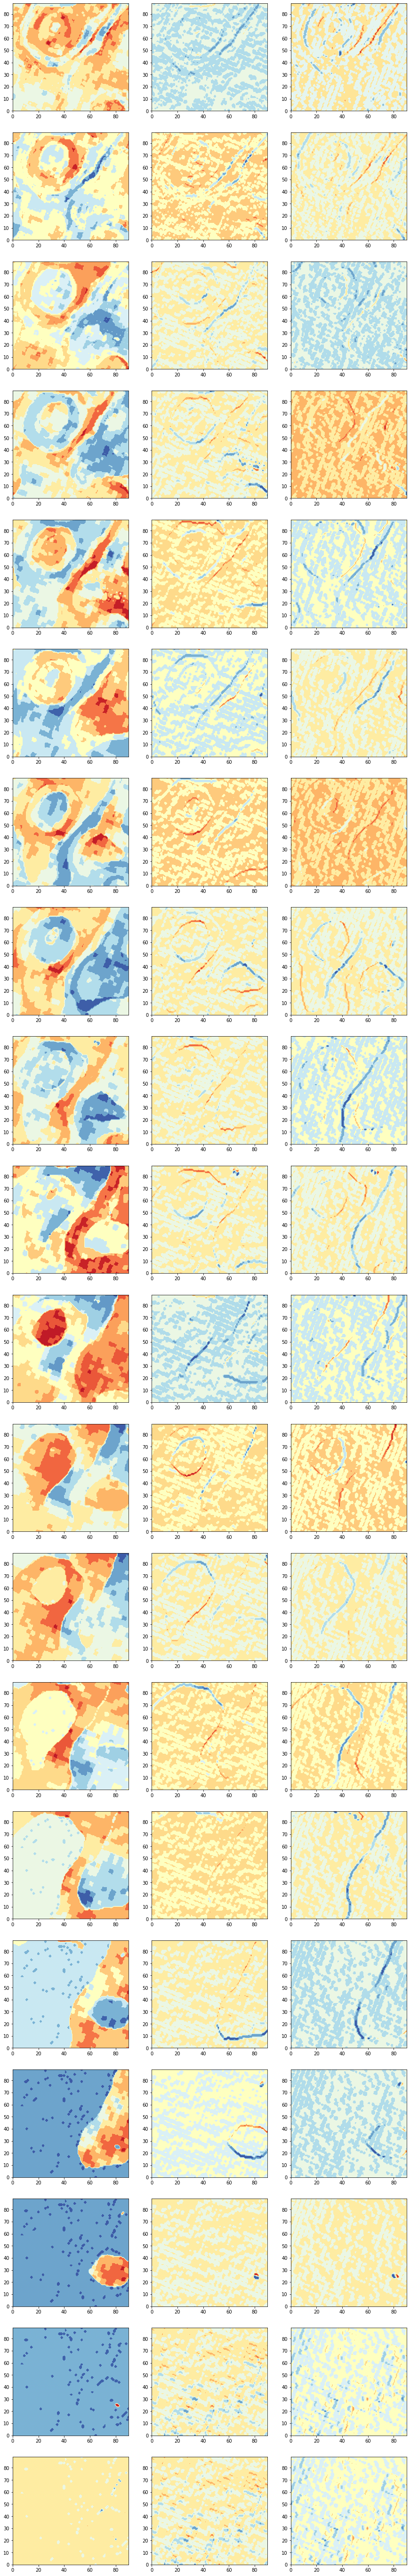

In [35]:
x = np.linspace(0,90,100)
y = np.linspace(0,89,90)
fig, ax = plt.subplots(nrows=20, ncols=3, figsize=(15, 100))
for i in range(20):
    ax[i][0].contourf(x, y, por_grad[0][i], cmap='RdYlBu')
    ax[i][1].contourf(x, y, por_grad[1][i], cmap='RdYlBu')
    ax[i][2].contourf(x, y, por_grad[2][i], cmap='RdYlBu')

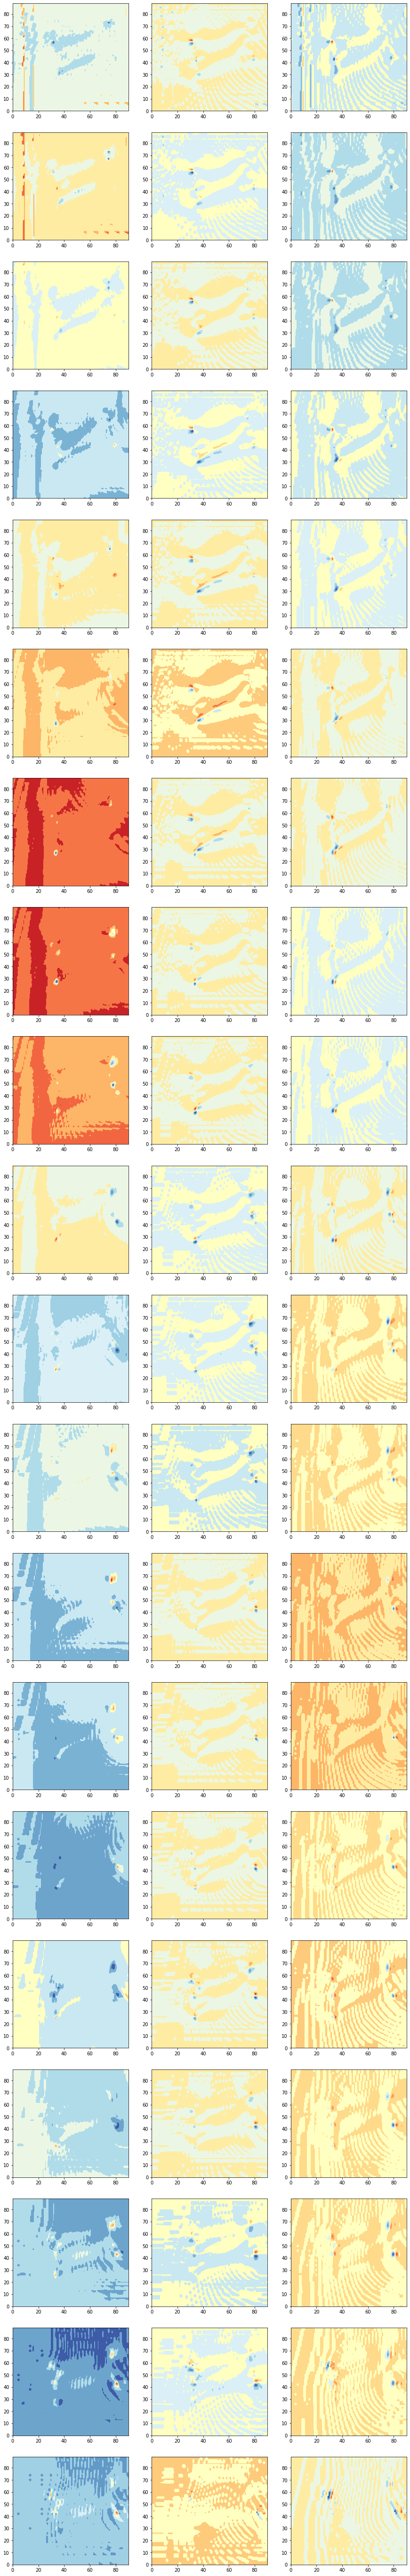

In [39]:
x = np.linspace(0,90,100)
y = np.linspace(0,89,90)
fig, ax = plt.subplots(nrows=20, ncols=3, figsize=(15, 100))
for i in range(20):
    ax[i][0].contourf(x, y, res_grad[0][i], cmap='RdYlBu')
    ax[i][1].contourf(x, y, res_grad[1][i], cmap='RdYlBu')
    ax[i][2].contourf(x, y, res_grad[2][i], cmap='RdYlBu')

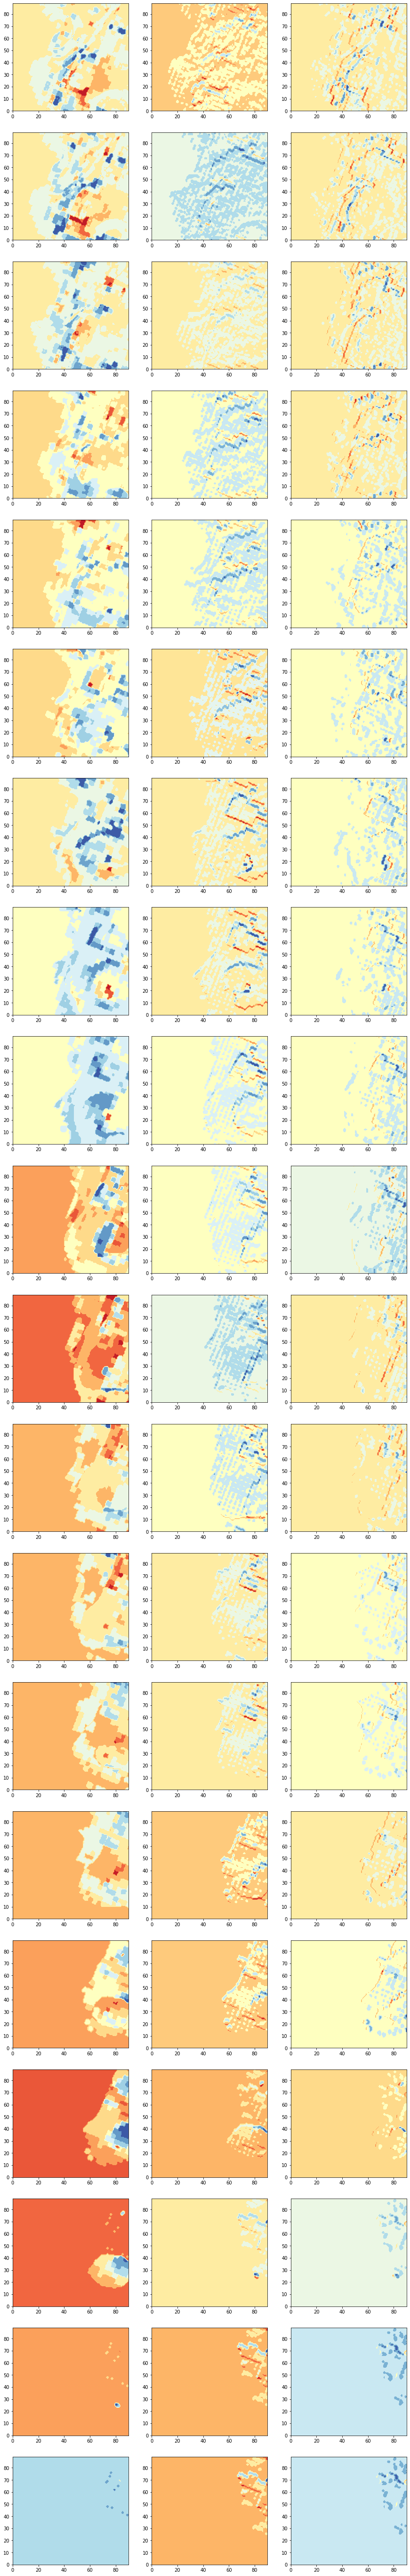

In [40]:
x = np.linspace(0,90,100)
y = np.linspace(0,89,90)
fig, ax = plt.subplots(nrows=20, ncols=3, figsize=(15, 100))
for i in range(20):
    ax[i][0].contourf(x, y, swat_grad[0][i], cmap='RdYlBu')
    ax[i][1].contourf(x, y, swat_grad[1][i], cmap='RdYlBu')
    ax[i][2].contourf(x, y, swat_grad[2][i], cmap='RdYlBu')

gradient calculation

In [36]:
grad_por = por_grad[0]+por_grad[1]+por_grad[2]
grad_res = res_grad[0]+res_grad[1]+res_grad[2]
grad_swat = swat_grad[0]+swat_grad[1]+swat_grad[2]

(20, 90, 100)

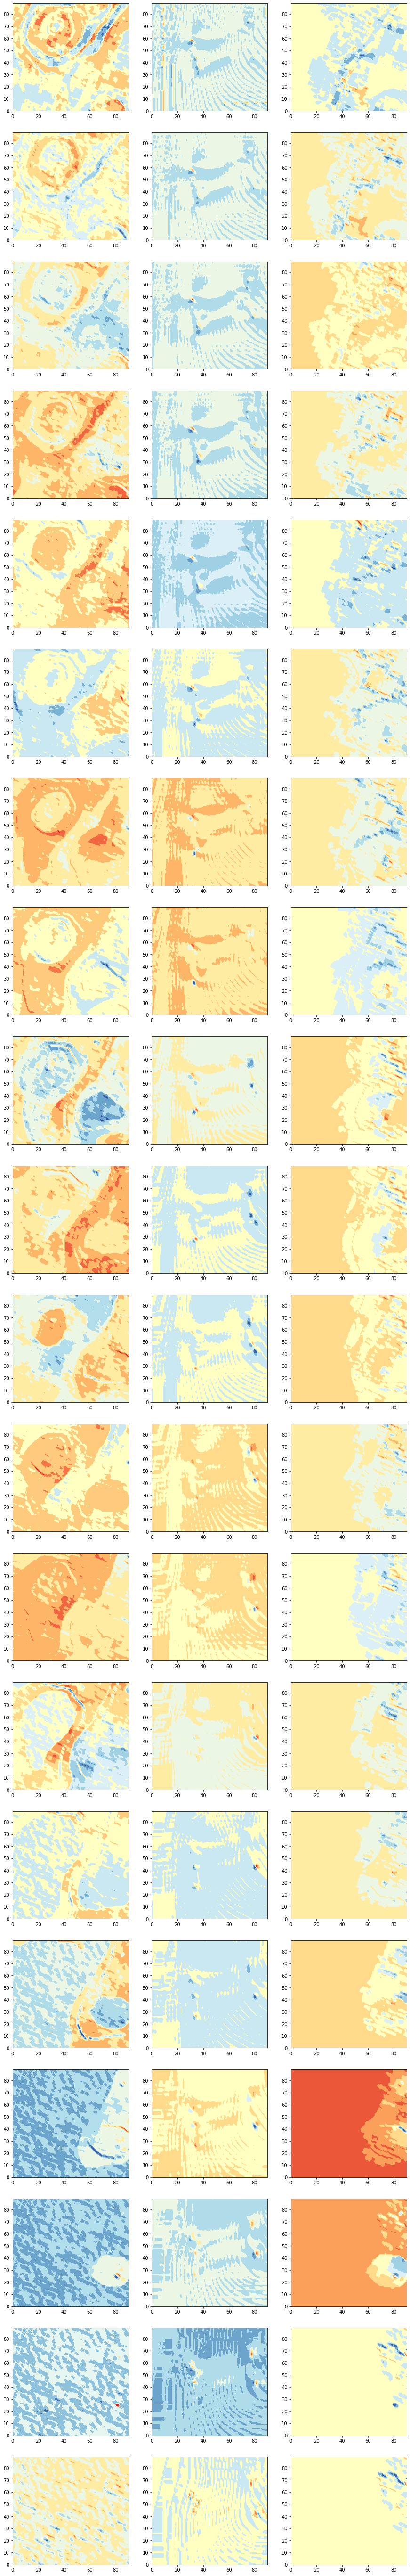

In [38]:
x = np.linspace(0,90,100)
y = np.linspace(0,89,90)
fig, ax = plt.subplots(nrows=20, ncols=3, figsize=(15, 100))
for i in range(20):
    ax[i][0].contourf(x, y, grad_por[i], cmap='RdYlBu')
    ax[i][1].contourf(x, y, grad_res[i], cmap='RdYlBu')
    ax[i][2].contourf(x, y, grad_swat[i], cmap='RdYlBu')

In [43]:
der = pd.DataFrame({'por_x':por_grad[2].flatten(), 'por_y':por_grad[1].flatten(),
                    'por_z':por_grad[0].flatten(), 'por_g':grad_por.flatten(),
                    'res_x':res_grad[2].flatten(), 'res_y':res_grad[1].flatten(),
                    'res_z':res_grad[0].flatten(), 'res_g':grad_res.flatten(),
                    'swat_x':swat_grad[2].flatten(), 'swat_y':swat_grad[1].flatten(),
                    'swat_z':swat_grad[0].flatten(), 'swat_g':grad_swat.flatten()})

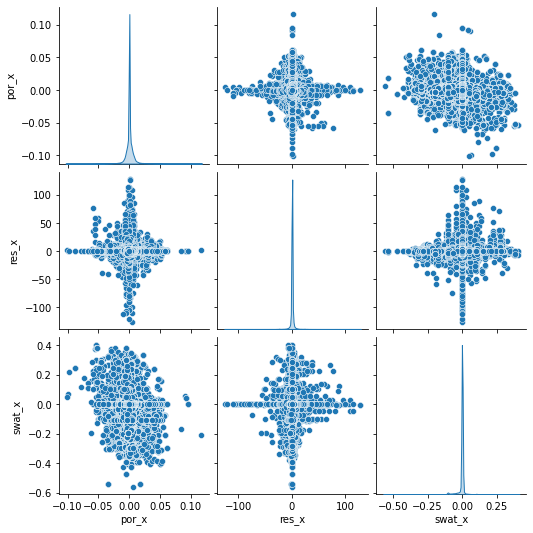

In [44]:
sns.pairplot(der[["por_x", "res_x", "swat_x"]], diag_kind="kde")

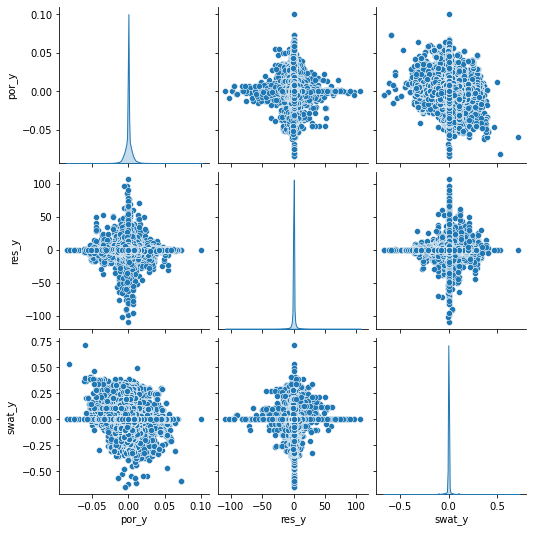

In [45]:
sns.pairplot(der[["por_y", "res_y", "swat_y"]], diag_kind="kde")

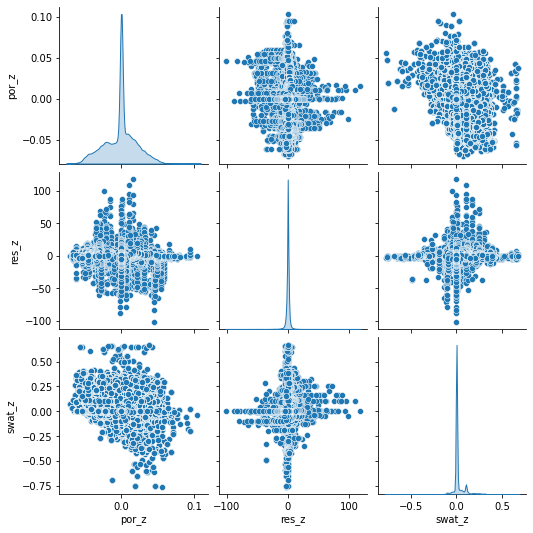

In [46]:
sns.pairplot(der[["por_z", "res_z", "swat_z"]], diag_kind="kde")

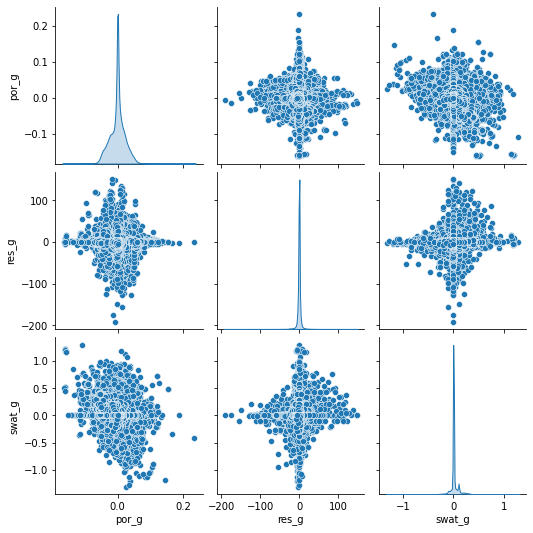

In [47]:
sns.pairplot(der[["por_g", "res_g", "swat_g"]], diag_kind="kde")